<a href="https://colab.research.google.com/github/Anchaliya75/Pancreatic-Cancer-Research-Paper-Implementation/blob/main/Pancreatic_Cancer_Model_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from pandas_profiling import ProfileReport


In [2]:
#Importing Dataset

df =pd.read_csv('/content/mmc1tabS1a-202204281228 (2).csv')

# Data Consist of Several Columns


*   Dx.Age  ->   Age of patient at the time of diagnosis
*   Dx.Date ->   Date Of Diagnosis
*   Dx.SzPrim.cm->Size of primary tumor at diagnosis
*   Dx.WasPrimExcis->Was primary surgically removed?
*   Dx.SzMetsLargest.cm ->Size of Largest Measured Metastasis 
*   Dx.SzMetsRange.cm ->Size Range of Metastasis (cm)
*   RPP.remark    ->Recurrence within Remnant Pancreas (if has tumor removed) or documented increase in size of unresectable pancreatic mass before death?
*   RPP.Date	->Date that recurrence/ progression in pancreas first documented
*   RPP.SzPanc.cm->Size of Mass in Pancreas (cm)
*   MR.remark ->Metastatic Recurrence (or new metastases) after Initial Diagnosis?
*  MR.Date  ->Date that metastases first documented
*  MR.SzMetsLargest.cm->Size of Largest Measured Metastasis (cm)
*  MP.remark ->Progression of Metastases previously documented (initial diagnosis or afterwards)?
* MP.Date ->Date of Documented Progression of Metastases after first found?
* MP.SzMetsLargest.cm  ->Size of Largest Measured Metastasis (cm)
* Aut.DateDeath  -> Date of Death
* Aut.Panc  ->Findings in Pancreas at Autopsy
* Aut.SzReTumorPanc->Size of Recurrent Tumor in Pancreas
* Aut.SzPrim.cm  ->Size of Primary at Autopsy (cm)
* Aut.MetsBurden ->Metastatic Burden at Autopsy
* Aut.MeanSzMets.cm ->Mean Size of Metastases (cm)
* Aut.SzMetsRange.cm ->Range of Metastases (cm)
* Aut.minSzMetsRange.cm ->Min Size Of Metastases(cm)
* Aut.maxSzMetsRange.cm  ->max Size Of Metastases(cm)
*  timeline ->Difference between Date Of Dignostic and date Of Death
*Result->Whether alive or dead as all are dead hence all are 1 useful in Survival Models





In [3]:
df.drop(columns=['Case'],axis =0,inplace =True) 

In [4]:
df.head()  # Looking at data

,Dx.Age,Dx.Date,Dx.SzPrim.cm,Dx.WasPrimExcis,Dx.SzMetsLargest.cm,Dx.SzMetsRange.cm,RPP.remark,RPP.Date,RPP.SzPanc.cm,MR.remark,...,Aut.Panc,Aut.SzReTumorPanc,Aut.SzPrim.cm,Aut.MetsBurden,Aut.MeanSzMets.cm,Aut.SzMetsRange.cm,Aut.minSzMetsRange.cm,Aut.maxSzMetsRange.cm,timeline,result
0,84,05-05-1995,6.0,No,NaN,x,no data,NaN,NaN,no data,...,Present (Not Resected),NaN,6.0,000to10,1.0,0.5-2.8,0.5,2.8,174,1
1,62,16-12-2002,3.0,No,2.0,01-Feb,Yes,27-01-2003,7.0,"Yes, increase in size and number in liver",...,Present (Not Resected),NaN,4.0,100sto1000s,0.3,0.2-2,0.2,2.0,161,1
2,67,25-07-2002,2.0,No,2.0,01-Feb,Yes,12-05-2003,4.0,Yes,...,Present (Not Resected),NaN,4.0,011to100,3.0,1.0-5.0,1.0,5.0,334,1
3,47,02-12-2002,5.0,No,NaN,x,No,NaN,NaN,No,...,Present (Not Resected),NaN,5.0,000to10,NaN,NaN,NaN,NaN,256,1
4,57,15-01-2003,4.0,No,1.0,0.3-1,No,NaN,NaN,No,...,Present (Not Resected),NaN,5.0,100sto1000s,0.5,0.2-2.0,0.2,2.0,229,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Dx.Age                 101 non-null    int64  
 1   Dx.Date                101 non-null    object 
 2   Dx.SzPrim.cm           101 non-null    float64
 3   Dx.WasPrimExcis        101 non-null    object 
 4   Dx.SzMetsLargest.cm    36 non-null     float64
 5   Dx.SzMetsRange.cm      100 non-null    object 
 6   RPP.remark             101 non-null    object 
 7   RPP.Date               44 non-null     object 
 8   RPP.SzPanc.cm          40 non-null     float64
 9   MR.remark              97 non-null     object 
 10  MR.Date                44 non-null     object 
 11  MR.SzMetsLargest.cm    41 non-null     float64
 12  MP.remark              97 non-null     object 
 13  MP.Date                26 non-null     object 
 14  MP.SzMetsLargest.cm    26 non-null     float64
 15  Aut.Da

In [6]:
df['Dx.WasPrimExcis'] = df['Dx.WasPrimExcis'].map(
                   {'Yes':1 ,'No':0})# Mapping Dx.SzPrim.cmcolumn(Size of primary tumor at diagnosis) to 1 and 0
#for prediction 1 means there is a surgery and 0 means No surgery

In [29]:
df_int4_float_64 =df.select_dtypes(include=['int64','float64']).columns

In [30]:
df_lasso=df[df_int4_float_64]
df_ridge=df[df_int4_float_64]
df_xgboost=df[df_int4_float_64]

In [31]:
df_lasso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Dx.Age                 101 non-null    int64  
 1   Dx.SzPrim.cm           101 non-null    float64
 2   Dx.WasPrimExcis        101 non-null    int64  
 3   Dx.SzMetsLargest.cm    36 non-null     float64
 4   RPP.SzPanc.cm          40 non-null     float64
 5   MR.SzMetsLargest.cm    41 non-null     float64
 6   MP.SzMetsLargest.cm    26 non-null     float64
 7   Aut.SzReTumorPanc      20 non-null     float64
 8   Aut.SzPrim.cm          75 non-null     float64
 9   Aut.MeanSzMets.cm      84 non-null     float64
 10  Aut.minSzMetsRange.cm  83 non-null     float64
 11  Aut.maxSzMetsRange.cm  83 non-null     float64
 12  timeline               101 non-null    int64  
 13  result                 101 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 11.2 KB


In [32]:
# Fill missing values with median values
df_lasso= df_lasso.apply(lambda x: x.fillna(x.median()),axis=0)
df_ridge=df_ridge.apply(lambda x :x.fillna(x.median()),axis=0)
df_xgboost=df_xgboost.apply(lambda x :x.fillna(x.median()),axis=0)

In [33]:
df_lasso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Dx.Age                 101 non-null    int64  
 1   Dx.SzPrim.cm           101 non-null    float64
 2   Dx.WasPrimExcis        101 non-null    int64  
 3   Dx.SzMetsLargest.cm    101 non-null    float64
 4   RPP.SzPanc.cm          101 non-null    float64
 5   MR.SzMetsLargest.cm    101 non-null    float64
 6   MP.SzMetsLargest.cm    101 non-null    float64
 7   Aut.SzReTumorPanc      101 non-null    float64
 8   Aut.SzPrim.cm          101 non-null    float64
 9   Aut.MeanSzMets.cm      101 non-null    float64
 10  Aut.minSzMetsRange.cm  101 non-null    float64
 11  Aut.maxSzMetsRange.cm  101 non-null    float64
 12  timeline               101 non-null    int64  
 13  result                 101 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 11.2 KB


In [34]:
df_ridge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Dx.Age                 101 non-null    int64  
 1   Dx.SzPrim.cm           101 non-null    float64
 2   Dx.WasPrimExcis        101 non-null    int64  
 3   Dx.SzMetsLargest.cm    101 non-null    float64
 4   RPP.SzPanc.cm          101 non-null    float64
 5   MR.SzMetsLargest.cm    101 non-null    float64
 6   MP.SzMetsLargest.cm    101 non-null    float64
 7   Aut.SzReTumorPanc      101 non-null    float64
 8   Aut.SzPrim.cm          101 non-null    float64
 9   Aut.MeanSzMets.cm      101 non-null    float64
 10  Aut.minSzMetsRange.cm  101 non-null    float64
 11  Aut.maxSzMetsRange.cm  101 non-null    float64
 12  timeline               101 non-null    int64  
 13  result                 101 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 11.2 KB


In [35]:
Y_lasso=df_lasso['timeline']
df_lasso.drop(columns=["timeline","result","Aut.maxSzMetsRange.cm","Aut.minSzMetsRange.cm","Aut.MeanSzMets.cm","Aut.SzPrim.cm","Aut.SzReTumorPanc","MP.SzMetsLargest.cm",],inplace=True)

In [36]:
Y_ridge=df_ridge['timeline']
df_ridge.drop(columns=["timeline","result","Aut.maxSzMetsRange.cm","Aut.minSzMetsRange.cm","Aut.MeanSzMets.cm","Aut.SzPrim.cm","Aut.SzReTumorPanc","MP.SzMetsLargest.cm",],inplace=True)

In [37]:
Y_xgboost=df_xgboost['timeline']
df_xgboost.drop(columns=["timeline","result","Aut.maxSzMetsRange.cm","Aut.minSzMetsRange.cm","Aut.MeanSzMets.cm","Aut.SzPrim.cm","Aut.SzReTumorPanc","MP.SzMetsLargest.cm",],inplace=True)

In [38]:
X_lasso=df_lasso.to_numpy()
Y_lasso=Y_lasso.to_numpy().reshape(-1,1)

In [39]:
X_ridge=df_ridge.to_numpy()
Y_ridge=Y_ridge.to_numpy().reshape(-1,1)



In [40]:
X_xgboost=df_xgboost.to_numpy()
Y_xgboost=Y_xgboost.to_numpy().reshape(-1,1)

In [41]:
#Optimisation Karna hain 
alphas = [-5, -1, 1e-4, 1e-3, 1e-2, 1, 5]

def test_alpha(a):
    model_lasso = Lasso(alpha=a)
    model_lasso.fit(X_lasso, Y_lasso) 
    pred_test_lasso = model_lasso.predict(X_lasso)
    new_score = r2_score(Y_lasso, pred_test_lasso)
    new_mse = mean_squared_error(Y_lasso, pred_test_lasso)
    print('ALPHA: {:.3f} R2 SCORE: {:.4f}% new_score, {:.1f}'.format(a, new_score, new_mse))
    
    
for alpha in alphas:
   test_alpha(alpha)



ALPHA: -5.000 R2 SCORE: 0.2553% new_score, 157979.7
ALPHA: -1.000 R2 SCORE: 0.2563% new_score, 157778.0
ALPHA: 0.000 R2 SCORE: 0.2563% new_score, 157769.6
ALPHA: 0.001 R2 SCORE: 0.2563% new_score, 157769.6
ALPHA: 0.010 R2 SCORE: 0.2563% new_score, 157769.6
ALPHA: 1.000 R2 SCORE: 0.2563% new_score, 157778.0
ALPHA: 5.000 R2 SCORE: 0.2554% new_score, 157973.3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.121e+07, tolerance: 2.143e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.174e+07, tolerance: 2.143e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented

In [42]:
alphas = [-5, -1, 1e-4, 1e-3, 1e-2, 1, 5]

def test_alpha_ridge(a):
    model_ridge = Ridge(alpha=a)
    model_ridge.fit(X_ridge, Y_ridge) 
    pred_test_ridge = model_ridge.predict(X_ridge)
    new_score = r2_score(Y_ridge, pred_test_ridge)
    new_mse = mean_squared_error(Y_ridge, pred_test_ridge)
    print('ALPHA: {:.3f} R2 SCORE: {:.4f}% new_score, {:.1f}'.format(a, new_score, new_mse))
    
    
for alpha in alphas:
    test_alpha_ridge(alpha)

ALPHA: -5.000 R2 SCORE: 0.2276% new_score, 163867.0
ALPHA: -1.000 R2 SCORE: 0.2557% new_score, 157908.0
ALPHA: 0.000 R2 SCORE: 0.2563% new_score, 157769.6
ALPHA: 0.001 R2 SCORE: 0.2563% new_score, 157769.6
ALPHA: 0.010 R2 SCORE: 0.2563% new_score, 157769.6
ALPHA: 1.000 R2 SCORE: 0.2558% new_score, 157879.3
ALPHA: 5.000 R2 SCORE: 0.2476% new_score, 159617.5


In [43]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(X_xgboost,Y_xgboost, verbose=False)

[17:58:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [44]:
Y_xgboost=Y_xgboost.reshape(-1,)

In [45]:
predicted=my_model.predict(X_lasso)
r2_score(predicted,Y_xgboost )# Score is on training data 

0.7838717628328372

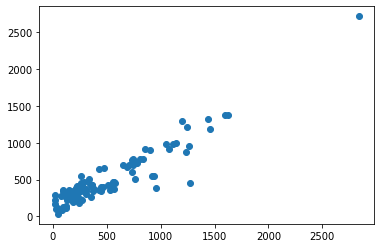

In [48]:
plt.scatter(x=Y_xgboost, y=predicted)
plt.show()
# Y axis is Predicted value and X-axis is label The closeness shows the quality of fit

In [49]:
from sklearn import preprocessing

importance_df = my_model.get_booster().get_score(importance_type='weight')

features_impt_xgb = pd.DataFrame(list(importance_df.items()), columns = ['FEATURE' , 'SCORE'])

print(features_impt_xgb.sort_values('SCORE', ascending = False).head(20))

  FEATURE  SCORE
1      f4    149
4      f0    134
3      f1    115
2      f3     51
5      f5     34
0      f2     18


Using Xgboost 
*  RPP.SzPanc.cm have max feature score 
*  Dx.Age have 2nd max
*  Dx.SzMetsLargest.cm have 3rd max feature score





